In [ ]:
# Import 3rd party dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from imblearn.over_sampling import SMOTE
from torch.autograd.functional import hessian
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from google.colab import files
import pickle

In [ ]:
# Suppressing Warnings and Adjusting Display Width
# We ignore any warning messages that might arise during execution to maintain clean output.
# Additionally, we adjust the display width to ensure that the content is fully visible within the Jupyter notebook.

warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load the data, exploratory data analysis, and data splitting

In [ ]:
!wget -O "pendigits-tes.csv" "https://drive.google.com/uc?export=download&id=1OfTCPU2-yVh-CTiI8dpzFabp_fd-Brpd"
!wget -O "pendigits-tra.csv" "https://drive.google.com/uc?export=download&id=19uEBgGUyag2Cgh_hNXlpZaw0XCBgRCYw"

--2024-08-22 21:23:39--  https://drive.google.com/uc?export=download&id=1OfTCPU2-yVh-CTiI8dpzFabp_fd-Brpd
Resolving drive.google.com (drive.google.com)... 172.217.214.101, 172.217.214.100, 172.217.214.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1OfTCPU2-yVh-CTiI8dpzFabp_fd-Brpd&export=download [following]
--2024-08-22 21:23:39--  https://drive.usercontent.google.com/download?id=1OfTCPU2-yVh-CTiI8dpzFabp_fd-Brpd&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.184.132, 2607:f8b0:4001:c66::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234366 (229K) [application/octet-stream]
Saving to: ‘pendigits-tes.csv’

pendigits-tes.csv   100%[===================>] 228.87K  

In [ ]:
# Load the data
def prepareData():
  train_data = pd.read_csv("pendigits-tra.csv", header= None)
  test_data = pd.read_csv("pendigits-tes.csv", header= None)
  x_train = train_data.iloc[:, 0:16]
  y_train = train_data[16]
  x_test = test_data.iloc[:, 0:16]
  y_test = test_data[16]

  return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

def dataScaling(x_train, x_test):
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  return x_train, x_test

x_train, y_train, x_test, y_test = prepareData()
x_train, x_test = dataScaling(x_train, x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [ ]:
# Print the data table
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.47,1.00,0.27,0.81,0.57,0.37,0.26,0.00,0.00,0.23,0.56,0.53,1.00,0.90,0.40,0.98
1,0.00,0.89,0.27,1.00,0.42,0.75,0.29,0.45,0.15,0.15,0.37,0.00,0.69,0.02,1.00,0.06
2,0.00,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.75,0.50,0.51,0.28,0.25,0.16,0.00
3,0.00,1.00,0.07,0.92,0.05,0.68,0.19,0.45,0.86,0.34,1.00,0.45,0.74,0.23,0.67,0.00
4,0.00,0.67,0.49,0.83,1.00,1.00,0.81,0.80,0.60,0.60,0.40,0.40,0.33,0.20,0.47,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0.00,0.82,0.09,0.59,0.56,0.34,0.41,0.00,0.10,0.30,0.03,0.67,0.42,0.96,1.00,1.00
7490,0.49,1.00,0.00,0.70,0.24,0.56,1.00,0.65,0.86,0.85,0.44,0.77,0.21,0.38,0.06,0.00
7491,1.00,0.98,0.60,1.00,0.24,0.87,0.03,0.58,0.35,0.51,0.58,0.26,0.36,0.00,0.00,0.05
7492,0.59,0.65,0.91,1.00,0.84,0.96,0.72,0.50,0.51,0.08,0.00,0.00,0.45,0.01,1.00,0.00


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7494 non-null   float64
 1   1       7494 non-null   float64
 2   2       7494 non-null   float64
 3   3       7494 non-null   float64
 4   4       7494 non-null   float64
 5   5       7494 non-null   float64
 6   6       7494 non-null   float64
 7   7       7494 non-null   float64
 8   8       7494 non-null   float64
 9   9       7494 non-null   float64
 10  10      7494 non-null   float64
 11  11      7494 non-null   float64
 12  12      7494 non-null   float64
 13  13      7494 non-null   float64
 14  14      7494 non-null   float64
 15  15      7494 non-null   float64
dtypes: float64(16)
memory usage: 936.9 KB


In [ ]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
mean,0.373843,0.846793,0.400056,0.828895,0.508783,0.650444,0.514718,0.445997,0.571300,0.340691,0.614174,0.357821,0.546998,0.358008,0.468137,0.285654
std,0.333220,0.168484,0.262560,0.196386,0.349272,0.273773,0.306801,0.306595,0.336803,0.274600,0.371308,0.274958,0.225998,0.332236,0.415318,0.358111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.760000,0.200000,0.700000,0.170000,0.480000,0.280000,0.220000,0.300000,0.070000,0.250000,0.120000,0.410000,0.070000,0.000000,0.000000
50%,0.310000,0.890000,0.390000,0.890000,0.560000,0.710000,0.540000,0.420000,0.600000,0.330000,0.740000,0.320000,0.530000,0.280000,0.390000,0.080000
75%,0.610000,1.000000,0.580000,1.000000,0.810000,0.860000,0.750000,0.650000,0.880000,0.550000,0.980000,0.570000,0.690000,0.480000,1.000000,0.510000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
predictor_columns = [col for col in x_train.columns]

# Count the number of predictor columns
num_predictor_columns = len(predictor_columns)

In [ ]:
# Normalize each predictor attribute using z-score
for predictor in predictor_columns:
    x_train[predictor] = (x_train[predictor] - x_train[predictor].mean()) / x_train[predictor].std()
    x_test[predictor] = (x_test[predictor] - x_test[predictor].mean()) / x_test[predictor].std()

In [ ]:
# Generate descriptive statistics for the dataset

x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03,7.494000e+03
mean,-1.635557e-17,1.531260e-16,-2.304002e-16,2.849187e-16,-4.835559e-17,4.195559e-17,6.897783e-17,-8.391117e-17,1.981631e-16,2.036150e-16,7.680006e-17,-8.367413e-17,3.072002e-16,3.982225e-17,-1.152001e-16,-6.257782e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.121910e+00,-5.025951e+00,-1.523673e+00,-4.220748e+00,-1.456696e+00,-2.375849e+00,-1.677696e+00,-1.454678e+00,-1.696241e+00,-1.240682e+00,-1.654084e+00,-1.301364e+00,-2.420367e+00,-1.077570e+00,-1.127178e+00,-7.976686e-01
25%,-9.718590e-01,-5.151429e-01,-7.619434e-01,-6.563362e-01,-9.699690e-01,-6.225746e-01,-7.650517e-01,-7.371189e-01,-8.055136e-01,-9.857659e-01,-9.807879e-01,-8.649343e-01,-6.061899e-01,-8.668767e-01,-1.127178e+00,-7.976686e-01
50%,-1.915942e-01,2.564428e-01,-3.829995e-02,3.111471e-01,1.466392e-01,2.175363e-01,8.240384e-02,-8.479204e-02,8.521379e-02,-3.893381e-02,3.388726e-01,-1.375515e-01,-7.521134e-02,-2.347961e-01,-1.881382e-01,-5.742741e-01
75%,7.087112e-01,9.093230e-01,6.853435e-01,8.712690e-01,8.624137e-01,7.654346e-01,7.668872e-01,6.653838e-01,9.165593e-01,7.622318e-01,9.852370e-01,7.716771e-01,6.327601e-01,3.671854e-01,1.280616e+00,6.264711e-01
max,1.879108e+00,9.093230e-01,2.284976e+00,8.712690e-01,1.406402e+00,1.276806e+00,1.581748e+00,1.806956e+00,1.272850e+00,2.400980e+00,1.039101e+00,2.335550e+00,2.004455e+00,1.932337e+00,1.280616e+00,1.994762e+00


In [ ]:
# Separate target variable from features
X_train = np.array(x_train)
X_test = np.array(x_test)

In [ ]:
# Select specific classes
idx_train = np.column_stack(np.where((y_train==0) | (y_train==1) | (y_train==2) | (y_train==3) | (y_train==5)))
idx_test = np.column_stack(np.where((y_test==0) | (y_test==1) | (y_test==2) | (y_test==3) | (y_test==5)))

y_train = y_train[idx_train]
X_train = X_train[idx_train,:]
X_train = np.squeeze(X_train)

y_test = y_test[idx_test]
X_test = X_test[idx_test,:]
X_test = np.squeeze(X_test)

In [ ]:
train_df = pd.DataFrame(X_train)
train_df = train_df.assign(target = y_train)

test_df = pd.DataFrame(X_test)
test_df = test_df.assign(target = y_test)

In [ ]:
y_train = train_df["target"]
X_train = train_df.drop("target", axis=1)
y_test = test_df["target"]
X_test = test_df.drop("target", axis=1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Store the mean, standard deviation, and normalized PDF using KDE for each predictor attribute and class
predictor_info = {}
column_index_map = {}
for i, col_name in enumerate(predictor_columns):
    column_index_map[i] = col_name
    pdf_all = gaussian_kde(X_train[col_name])
    pdf0 = gaussian_kde(X_train[train_df['target'] == 0][col_name])
    pdf1 = gaussian_kde(X_train[train_df['target'] == 1][col_name])
    pdf2 = gaussian_kde(X_train[train_df['target'] == 2][col_name])
    pdf3 = gaussian_kde(X_train[train_df['target'] == 3][col_name])
    pdf4 = gaussian_kde(X_train[train_df['target'] == 5][col_name])
    predictor_info[i] = {
        'mean': X_train[col_name].mean(),
        'std': X_train[col_name].std(),
        'pdf': pdf_all,
        'pdf0': pdf0,
        'pdf1': pdf1,
        'pdf2': pdf2,
        'pdf3': pdf3,
        'pdf4': pdf4
    }



In [ ]:
from scipy.stats import norm, entropy, gaussian_kde

def JSD(p, q):
    m = 0.5 * (p + q)
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [ ]:
# Define the x values where you want to evaluate the PDF
x = np.linspace(-3, 3, 100)

# Calculate the uniform PDF along x
uniform_prior_x = 1/6*np.ones(100)

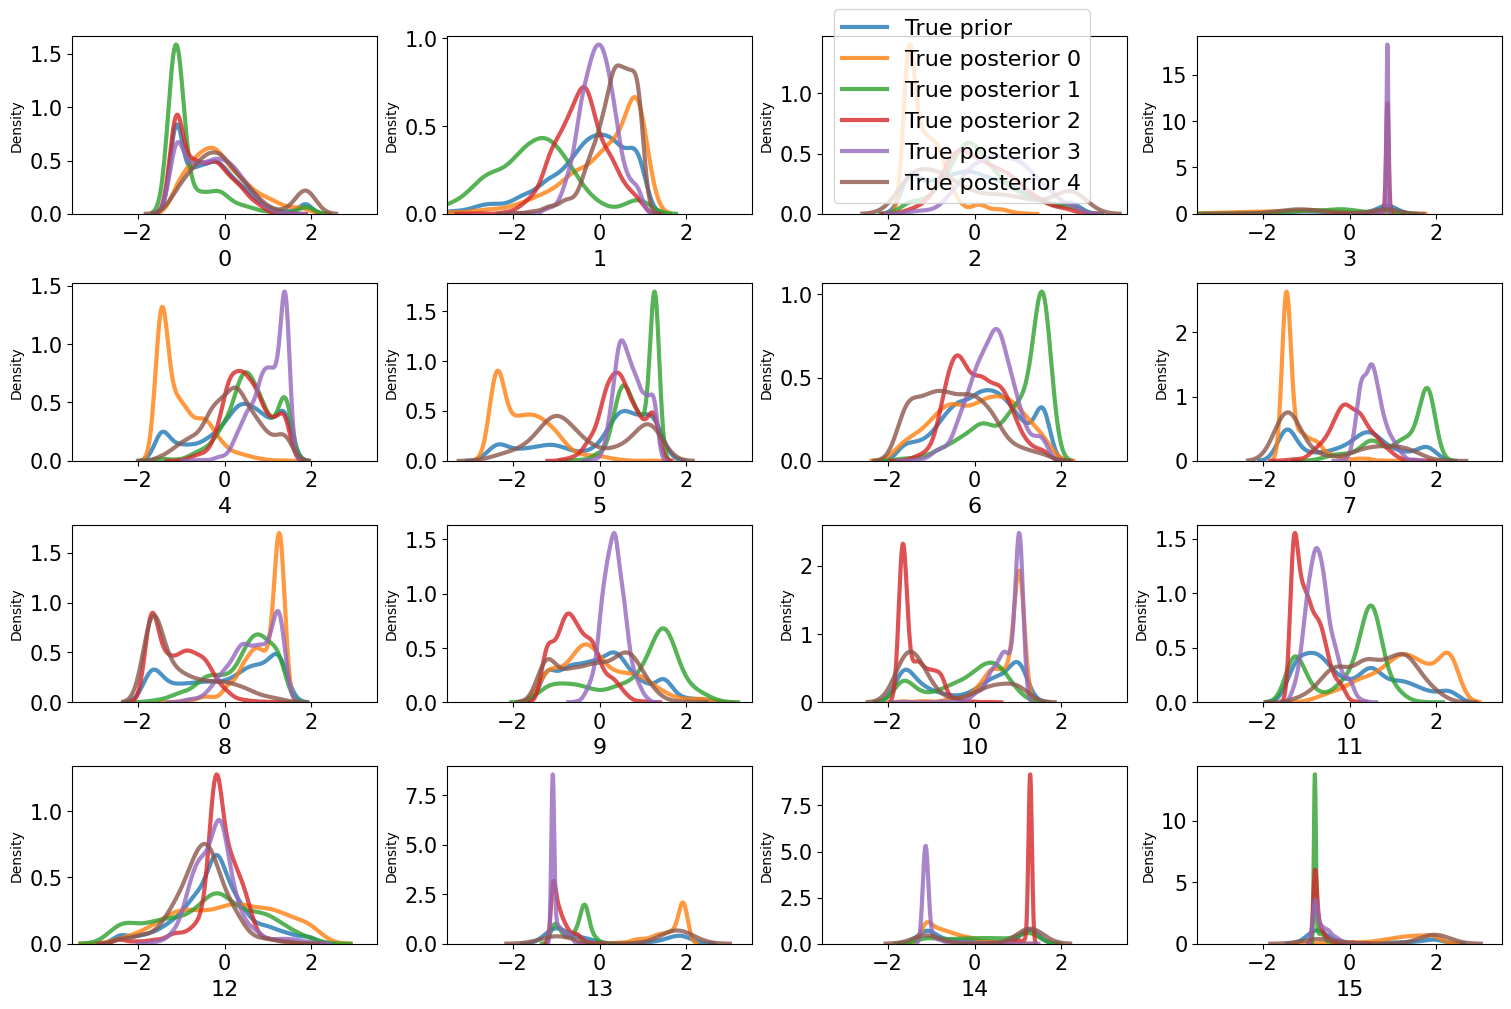

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Define the indices of the attributes to be plotted
selected_predictor_columns = predictor_columns

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 0], x=col_name, ax=axes[row, col], label='True posterior 0', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 1], x=col_name, ax=axes[row, col], label='True posterior 1', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 2], x=col_name, ax=axes[row, col], label='True posterior 2', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 3], x=col_name, ax=axes[row, col], label='True posterior 3', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 5], x=col_name, ax=axes[row, col], label='True posterior 4', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Add vertical lines at the mean of each attribute
    #axes[row, col].axvline(predictor_info[i]['mean'], linestyle='--', color='black', label='Mean')
    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

In [ ]:
# Set up the plot layout

prior_KLDs = []

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):


    # Plot uniform prior distribution
    true_prior_x = predictor_info[i]['pdf'](x)

    KLD_value = entropy(true_prior_x, uniform_prior_x)
    prior_KLDs.append(KLD_value)

prior_KLDs = np.array(prior_KLDs)

In [ ]:
# Get the indices that would sort the KLD values in descending order
prior_KLDs_sorted_indices = np.argsort(prior_KLDs)

# Display the indices order associated with descending order of KLD values
print("Indices order associated with descending order of KLD values:")
print(prior_KLDs_sorted_indices)

Indices order associated with descending order of KLD values:
[ 2 11  5  7  8 12  6  1  9  4  3 10 13 14  0 15]


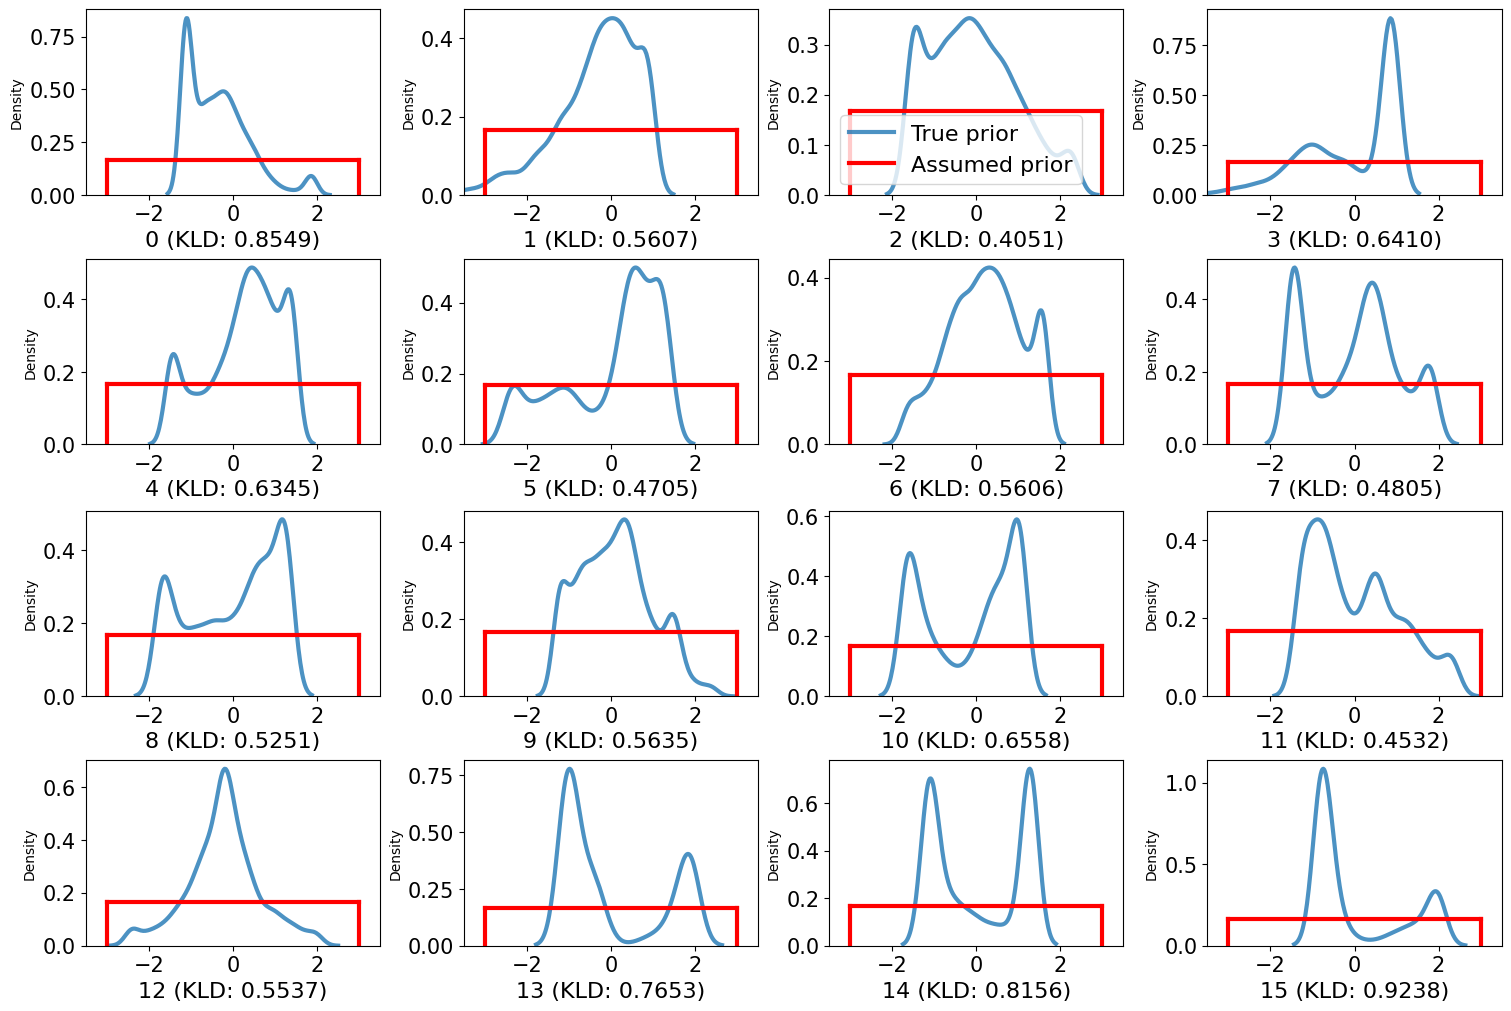

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)

    # Plot uniform prior distribution
    uniform_height = 1 / 6
    uniform_x = np.linspace(-3,3,100)
    uniform_y = np.full_like(uniform_x, uniform_height)
    axes[row, col].plot(uniform_x, uniform_y, label='Assumed prior', color='red', linewidth=3)

    max_uniform_y = uniform_height / axes[row, col].get_ylim()[1]

    # Add vertical lines on the left and right ends of the uniform distribution
    axes[row, col].axvline(x=-3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)
    axes[row, col].axvline(x=3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)


    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Display JSD value and attribute name as the title
    axes[row, col].set_xlabel(f'{col_name} (KLD: {prior_KLDs[i]:.4f})', fontsize=16)
    #axes[row, col].set_xlabel(col_name, fontsize=16)


    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

plt.show()

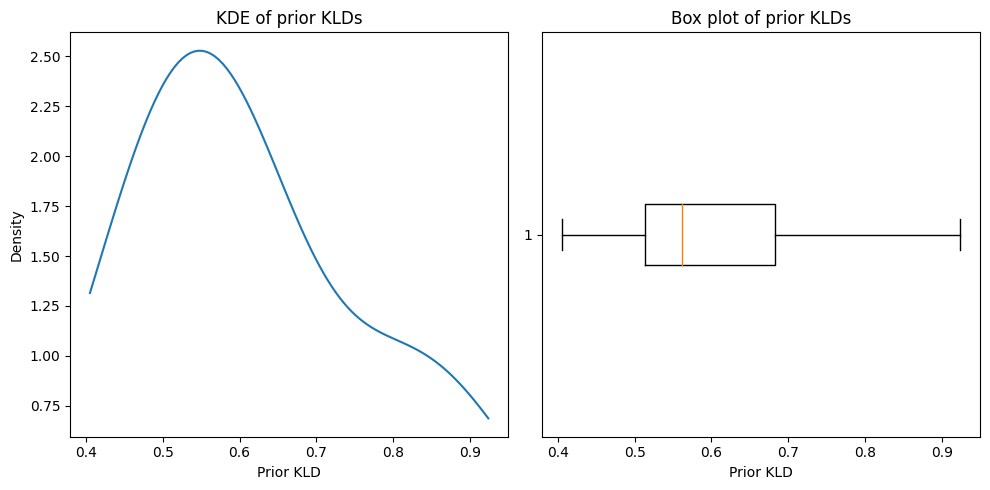

In [ ]:
# Create a figure with subplots for KDE and box plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot KDE of prior KLDs
kde = gaussian_kde(prior_KLDs)
y = np.linspace(min(prior_KLDs), max(prior_KLDs), 100)
ax1.plot(y, kde(y))
ax1.set_xlabel('Prior KLD')
ax1.set_ylabel('Density')
ax1.set_title('KDE of prior KLDs')

# Plot box plot of prior KLDs
ax2.boxplot(prior_KLDs, vert=False)
ax2.set_xlabel('Prior KLD')
ax2.set_title('Box plot of prior KLDs')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy, gaussian_kde


def proposal_within_range(current_params, scale):
    proposed_params = current_params + np.random.normal(0, scale, len(current_params))

    while not np.all(np.logical_and(-3 <= proposed_params, proposed_params <= 3)):
        idx_outside_range = np.where(np.logical_or(proposed_params < -3, proposed_params > 3))[0]
        proposed_params[idx_outside_range] = current_params[idx_outside_range] + np.random.normal(0, scale, len(idx_outside_range))

    return proposed_params



# Log Prior distribution
def log_uniform_prior(params):
    log_joint_probability = 0

    for i, param in enumerate(params):
        log_joint_probability += np.log(1/6)

    return log_joint_probability



# Likelihood function
def log_likelihood(params, data):
    feature_values = {col_name: [value] for col_name, value in zip(column_index_map.values(), params)}
    X_new = pd.DataFrame(feature_values)
    if data == 0:
        return np.log(ml.predict_proba(X_new)[0, 0])
    elif data == 1:
        return np.log(ml.predict_proba(X_new)[0, 1])
    elif data == 2:
        return np.log(ml.predict_proba(X_new)[0, 2])
    elif data == 3:
        return np.log(ml.predict_proba(X_new)[0, 3])
    else:
        return np.log(ml.predict_proba(X_new)[0, 4])



# Metropolis-Hastings MCMC algorithm
def metropolis_hastings(num_samples, initial_params, data):
    np.random.seed(42)

    current_params = initial_params
    accepted_params = [[] for _ in range(len(initial_params))]

    current_log_posterior = log_uniform_prior(current_params) + log_likelihood(current_params, data)

    iter = 0
    num_accepted = 0

    while num_accepted < num_samples:
        # Generate proposed params until likelihood >= 0.8
        proposed_params = np.zeros_like(current_params)
        proposed_likelihood = -np.inf

        iter = iter + 1

        num_proposing = 0
        while proposed_likelihood < np.log(0.5):
            num_proposing = num_proposing + 1
            proposed_params = proposal_within_range(current_params, 1)
            proposed_likelihood = log_likelihood(proposed_params, data)

        # Calculate acceptance probability
        proposed_log_posterior = log_uniform_prior(proposed_params) + proposed_likelihood
        acceptance_probability = np.exp(proposed_log_posterior - current_log_posterior)


        # Accept or reject the proposed parameter
        if np.random.rand() < acceptance_probability:
            num_accepted = num_accepted + 1

            if num_accepted % 1000 == 0:
                print("Num samples accepted: ", num_accepted)

            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            for i, param in enumerate(current_params):
                accepted_params[i].append(param)

    return accepted_params

In [ ]:
# Configuration settings for running MCMC and saving samples

run_MCMC = True
save_samples = True

data_shifts = [0, -0.2, -0.4, -0.6, -0.8, -1, 0.2, 0.4, 0.6, 0.8, 1]

samples_0_file_name = 'digit5_dnn_class_0_samples.pickle'
samples_1_file_name = 'digit5_dnn_class_1_samples.pickle'
samples_2_file_name = 'digit5_dnn_class_2_samples.pickle'
samples_3_file_name = 'digit5_dnn_class_3_samples.pickle'
samples_4_file_name = 'digit5_dnn_class_4_samples.pickle'

In [ ]:
from sklearn.naive_bayes import MultinomialNB

class0_samples = []
class1_samples = []
class2_samples = []
class3_samples = []
class4_samples = []

original_training_accuracies = []
original_test_accuracies = []

for shift in data_shifts:

    print('\n\n\nInverse estimation for data with shift ', shift)

    # Shift every value in the DataFrame to the right
    X_train_shifted = X_train.add(shift)


    # Resample the training set using RandomOverSampler to address class imbalance
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_shifted, y_train)



    print('\nModel evaluation on training set:')

    # Initialize Random Forest classifier

    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)
    ml.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_train, y_pred_proba, multi_class='ovr')
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='micro')
    recall = recall_score(y_train, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    original_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)



    print('\nModel evaluation on test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    if run_MCMC:

        # Run MCMC
        num_samples = 5000
        initial_params = np.zeros(num_predictor_columns)

        print('\nMCMC for class 0')
        accepted_params_zero = metropolis_hastings(num_samples, initial_params, 0)
        class0_samples.append(accepted_params_zero)

        print('\nMCMC for class 1')
        accepted_params_one = metropolis_hastings(num_samples, initial_params, 1)
        class1_samples.append(accepted_params_one)

        print('\nMCMC for class 2')
        accepted_params_two = metropolis_hastings(num_samples, initial_params, 2)
        class2_samples.append(accepted_params_two)

        print('\nMCMC for class 3')
        accepted_params_three = metropolis_hastings(num_samples, initial_params, 3)
        class3_samples.append(accepted_params_three)

        print('\nMCMC for class 4')
        accepted_params_four = metropolis_hastings(num_samples, initial_params, 4)
        class4_samples.append(accepted_params_four)

if save_samples:

    # Save the list to a file
    with open(samples_0_file_name, 'wb') as f:
        pickle.dump(class0_samples, f)

    files.download(samples_0_file_name)

    # Save the list to a file
    with open(samples_1_file_name, 'wb') as f:
        pickle.dump(class1_samples, f)

    files.download(samples_1_file_name)

    # Save the list to a file
    with open(samples_2_file_name, 'wb') as f:
        pickle.dump(class2_samples, f)

    files.download(samples_2_file_name)

    # Save the list to a file
    with open(samples_3_file_name, 'wb') as f:
        pickle.dump(class3_samples, f)

    files.download(samples_3_file_name)

    # Save the list to a file
    with open(samples_4_file_name, 'wb') as f:
        pickle.dump(class4_samples, f)

    files.download(samples_4_file_name)

if ~ run_MCMC:
    # Load the list from the file
    with open(samples_0_file_name, 'rb') as f:
        class0_samples = pickle.load(f)

    with open(samples_1_file_name, 'rb') as f:
        class1_samples = pickle.load(f)

    with open(samples_2_file_name, 'rb') as f:
        class2_samples = pickle.load(f)

    with open(samples_3_file_name, 'rb') as f:
        class3_samples = pickle.load(f)

    with open(samples_4_file_name, 'rb') as f:
        class4_samples = pickle.load(f)

original_training_accuracies = np.array(original_training_accuracies)
original_test_accuracies = np.array(original_test_accuracies)





Inverse estimation for data with shift  0

Model evaluation on training set:
Confusion Matrix:
[[780   0   0   0   0]
 [  0 779   0   0   0]
 [  0   0 780   0   0]
 [  0   0   1 718   0]
 [  0   0   0   0 720]]
Precision: 0.9997353096876654
Recall: 0.9997353096876654
Cohen Kappa Score: 0.9996690093875
Accuracy: 0.9997353096876654
Geometric Mean Score: 0.9997216810033553

Model evaluation on test set:
Confusion Matrix:
[[347  11   0   0   5]
 [  0 361   2   1   0]
 [  0   2 362   0   0]
 [  0   3   0 333   0]
 [  0   0   0   4 331]]
Precision: 0.9841089670828603
Recall: 0.9841089670828603
Cohen Kappa Score: 0.9801291348464717
Accuracy: 0.9841089670828603
Geometric Mean Score: 0.9841579375466292

MCMC for class 0
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000

MCMC for class 1
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num sa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
accepted_params_zero = class0_samples[0]
accepted_params_one = class1_samples[0]
accepted_params_two = class2_samples[0]
accepted_params_three = class3_samples[0]
accepted_params_four = class4_samples[0]

In [ ]:
# Define the est_posterior function with list comprehension
def est_posterior(a, prob, bins):
    return np.array([prob[np.digitize(val, bins) - 1] if (val > np.min(bins)) and (val < np.max(bins) and (prob[np.digitize(val, bins) - 1] != 0)) else 1e-9 for val in a])

In [ ]:
avg_posterior_KLDs = []


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_one[i], bins=100, density=True)
    est_post1 = est_posterior(x, prob, bins)


     # Posterior histogram
    prob, bins = np.histogram(accepted_params_zero[i], bins=100, density=True)
    est_post0 = est_posterior(x, prob, bins)

     # Posterior histogram
    prob, bins = np.histogram(accepted_params_two[i], bins=100, density=True)
    est_post2 = est_posterior(x, prob, bins)

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_three[i], bins=100, density=True)
    est_post3 = est_posterior(x, prob, bins)

     # Posterior histogram
    prob, bins = np.histogram(accepted_params_four[i], bins=100, density=True)
    est_post4 = est_posterior(x, prob, bins)


     # Prior distribution
    true_posterior1_x = predictor_info[i]['pdf1'](x)

    # Prior distribution
    true_posterior0_x = predictor_info[i]['pdf0'](x)

    # Prior distribution
    true_posterior2_x = predictor_info[i]['pdf2'](x)

    # Prior distribution
    true_posterior3_x = predictor_info[i]['pdf3'](x)

    # Prior distribution
    true_posterior4_x = predictor_info[i]['pdf4'](x)

    avg_KLD_value = (1/5)*entropy(true_posterior0_x, est_post0) + (1/5)*entropy(true_posterior1_x, est_post1) + (1/5)*entropy(true_posterior2_x, est_post2) + (1/5)*entropy(true_posterior3_x, est_post3) + (1/5)*entropy(true_posterior4_x, est_post4)
    avg_posterior_KLDs.append(avg_KLD_value)


avg_posterior_KLDs = np.array(avg_posterior_KLDs)

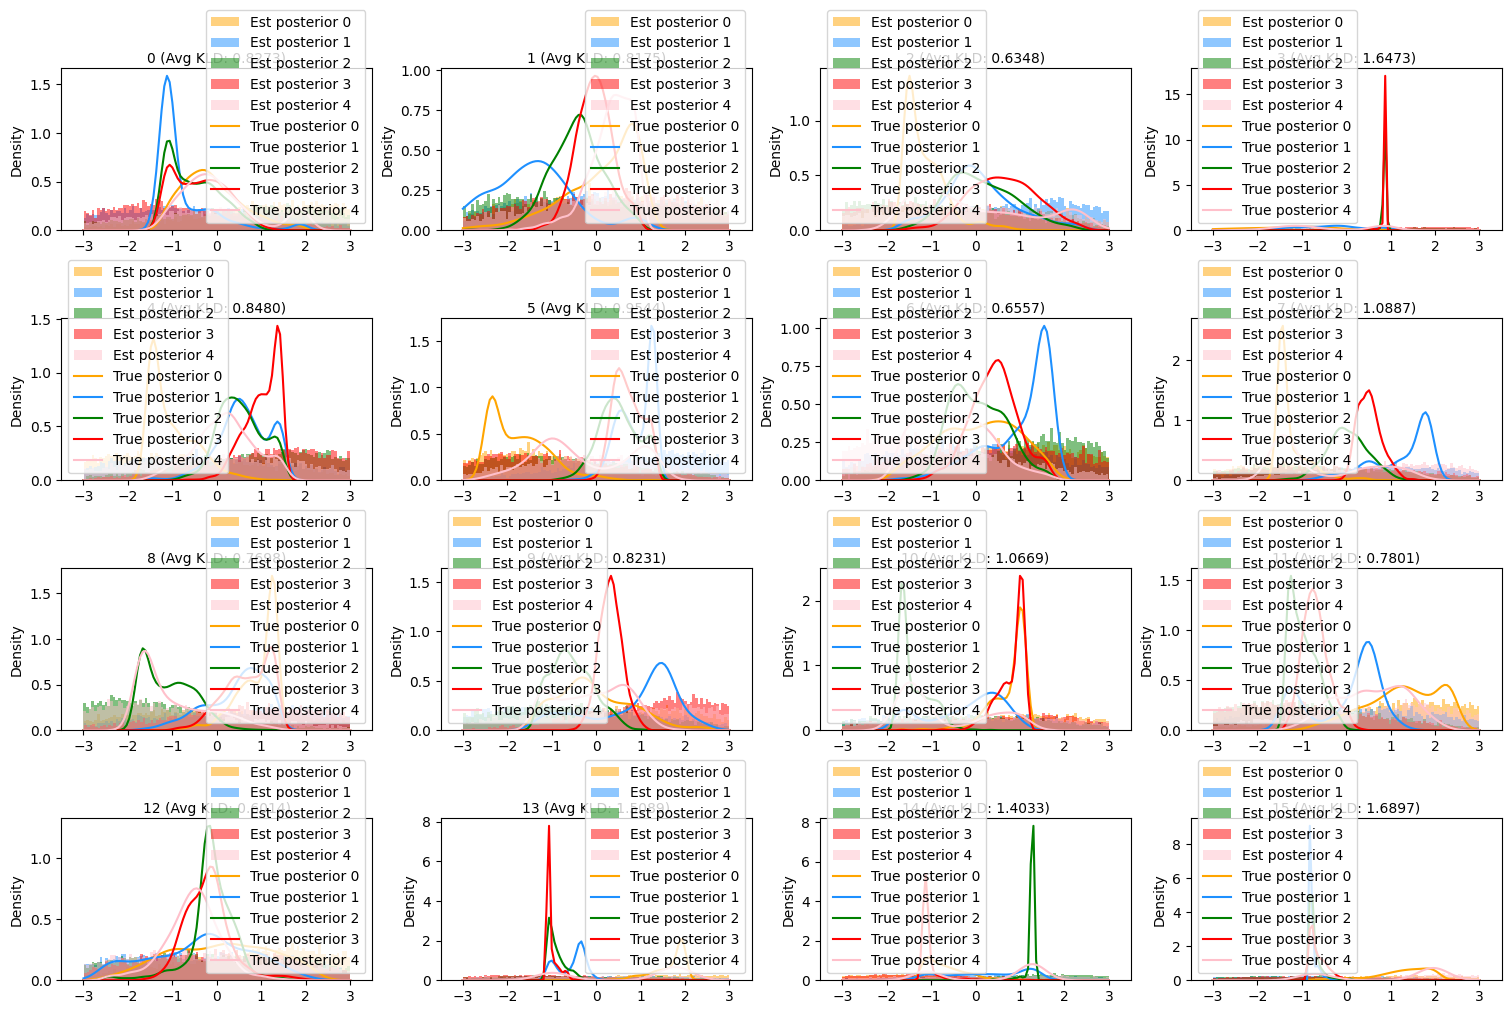

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[i], bins=100, density=True, alpha=0.5, label='Est posterior 0', color='orange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[i], bins=100, density=True, alpha=0.5, label='Est posterior 1', color='dodgerblue')
    post2, bins2, _ = axes[row, col].hist(accepted_params_two[i], bins=100, density=True, alpha=0.5, label='Est posterior 2', color='green')
    post3, bins3, _ = axes[row, col].hist(accepted_params_three[i], bins=100, density=True, alpha=0.5, label='Est posterior 3', color='red')
    post4, bins4, _ = axes[row, col].hist(accepted_params_four[i], bins=100, density=True, alpha=0.5, label='Est posterior 4', color='pink')

    # Prior distribution
    posterior0_x = predictor_info[i]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='True posterior 0', color='orange')

    # Prior distribution
    posterior1_x = predictor_info[i]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='True posterior 1', color='dodgerblue')

    # Prior distribution
    posterior2_x = predictor_info[i]['pdf2'](x)
    axes[row, col].plot(x, posterior2_x, label='True posterior 2', color='green')

    # Prior distribution
    posterior3_x = predictor_info[i]['pdf3'](x)
    axes[row, col].plot(x, posterior3_x, label='True posterior 3', color='red')

    # Prior distribution
    posterior4_x = predictor_info[i]['pdf4'](x)
    axes[row, col].plot(x, posterior4_x, label='True posterior 4', color='pink')

    axes[row, col].xaxis.set_label_position('top')
    axes[row, col].set_xlim(-3.5, 3.5)
    axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[i]:.4f})')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.show()

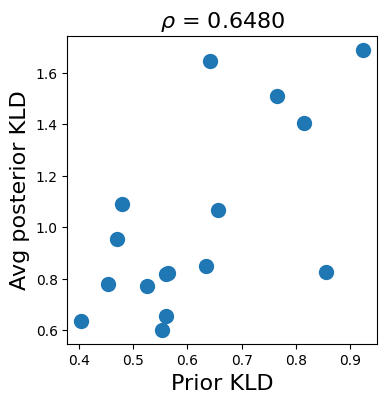

In [ ]:
avg_post_KLDs_all_params = []

for i, shift in enumerate(data_shifts):

    #print('\n\n\nPrior JSD vs  Avg posterior KLD for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]
    accepted_params_two = class2_samples[i]
    accepted_params_three = class3_samples[i]
    accepted_params_four = class4_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)
    accepted_params_two = np.array(accepted_params_two)
    accepted_params_three = np.array(accepted_params_three)
    accepted_params_four = np.array(accepted_params_four)

    avg_posterior_KLDs = []


    # Plot the KDEs for each attribute and class
    for j, col_name in enumerate(predictor_columns):
        row = j // ncols
        col = j % ncols

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_one[j], bins=100, density=True)
        est_post1 = est_posterior(x, prob, bins)


        # Posterior histogram
        prob, bins = np.histogram(accepted_params_zero[j], bins=100, density=True)
        est_post0 = est_posterior(x, prob, bins)

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_two[j], bins=100, density=True)
        est_post2 = est_posterior(x, prob, bins)

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_three[j], bins=100, density=True)
        est_post3 = est_posterior(x, prob, bins)

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_four[j], bins=100, density=True)
        est_post4 = est_posterior(x, prob, bins)


        # Prior distribution
        true_posterior1_x = predictor_info[j]['pdf1'](x)

        # Prior distribution
        true_posterior0_x = predictor_info[j]['pdf0'](x)

        # Prior distribution
        true_posterior2_x = predictor_info[j]['pdf2'](x)

        # Prior distribution
        true_posterior3_x = predictor_info[j]['pdf3'](x)

        # Prior distribution
        true_posterior4_x = predictor_info[j]['pdf4'](x)

        avg_KLD_value = (1/5)*entropy(true_posterior0_x, est_post0) + (1/5)*entropy(true_posterior1_x, est_post1) + (1/5)*entropy(true_posterior2_x, est_post2) + (1/5)*entropy(true_posterior3_x, est_post3) + (1/5)*entropy(true_posterior4_x, est_post4)
        avg_posterior_KLDs.append(avg_KLD_value)


    avg_posterior_KLDs = np.array(avg_posterior_KLDs)
    avg_post_KLDs_all_params.append(np.mean(avg_posterior_KLDs))


    if shift==0:
        plt.figure(figsize=(4, 4))

        # Create a scatter plot of the two sets of importance values
        plt.scatter(prior_KLDs, avg_posterior_KLDs, s=100)


        # Calculate the correlation coefficient between the two sets of importance values
        correlation_coefficient = np.corrcoef(prior_KLDs, avg_posterior_KLDs)[0, 1]

        # Set the axis labels and title
        plt.xlabel('Prior KLD', fontsize=16)
        plt.ylabel('Avg posterior KLD', fontsize=16)
        plt.title('$\\rho$ = {:.4f}'.format(correlation_coefficient), fontsize=16)

        # Display the plot
        plt.show()

avg_post_KLDs_all_params = np.array(avg_post_KLDs_all_params)


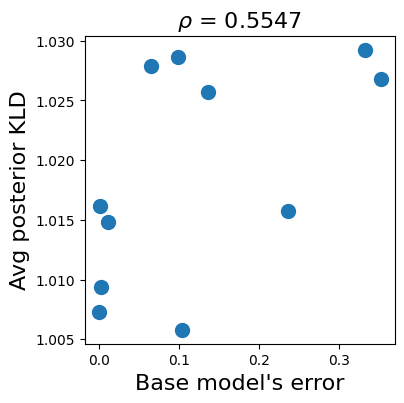

In [ ]:
plt.figure(figsize=(4, 4))

# Create a scatter plot of the two sets of importance values
plt.scatter(1-original_training_accuracies[:], avg_post_KLDs_all_params[:], s=100)


# Calculate the correlation coefficient between the two sets of importance values
training_correlation_coefficient = np.corrcoef(1-original_training_accuracies[:], avg_post_KLDs_all_params[:])[0, 1]

# Set the axis labels and title
plt.xlabel('Base model\'s error', fontsize=16)
plt.ylabel('Avg posterior KLD', fontsize=16)
plt.title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Display the plot
plt.show()

In [ ]:
synthetic_training_accuracies = []
synthetic_test_accuracies = []

for i, shift in enumerate(data_shifts):

    print('\n\n\nSynthetic models for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]
    accepted_params_two = class2_samples[i]
    accepted_params_three = class3_samples[i]
    accepted_params_four = class4_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)
    accepted_params_two = np.array(accepted_params_two)
    accepted_params_three = np.array(accepted_params_three)
    accepted_params_four = np.array(accepted_params_four)

    # Concatenate accepted_params_one and accepted_params_zero along the rows axis
    simulated_dataset = np.concatenate((accepted_params_one, accepted_params_zero, accepted_params_two, accepted_params_three, accepted_params_four), axis=1)

    # Transpose the dataset to have 2000 records and 15 predictor attributes
    simulated_dataset = simulated_dataset.T

    # Create an array of class labels (1 for class 1 and 0 for class 0)
    class_labels = np.concatenate((np.ones(accepted_params_one.shape[1]), np.zeros(accepted_params_zero.shape[1]), np.full(accepted_params_two.shape[1], 2), np.full(accepted_params_two.shape[1], 3), np.full(accepted_params_two.shape[1], 4)))

    # Add the class labels as the 16th attribute
    simulated_dataset = np.column_stack((simulated_dataset, class_labels))

    data_columns = [col for col in train_df.columns]

    # Convert binary_dataset to a DataFrame
    simulated_dataset_df = pd.DataFrame(simulated_dataset)

    # Rename the columns of simulated_dataset_df to match dataset_df
    simulated_dataset_df.columns = train_df.columns

    # Check the first few rows of simulated_dataset_df
    simulated_dataset_df

    # Separate target variable from features
    sim_train_y = simulated_dataset_df["target"]
    sim_train_X = simulated_dataset_df.drop("target", axis=1)

    print('\nSynthetic model evaluation on original training set:')

    # Initialize Random Forest classifier
    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(sim_train_X, sim_train_y)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='micro')
    recall = recall_score(y_train, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    synthetic_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    print('\nSynthetic model evaluation on original test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    synthetic_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


synthetic_training_accuracies = np.array(synthetic_training_accuracies)
synthetic_test_accuracies = np.array(synthetic_test_accuracies)




Synthetic models for data with shift  0

Synthetic model evaluation on original training set:
Confusion Matrix:
[[780   0   0   0   0   0]
 [  0 770   9   0   0   0]
 [  0   0 780   0   0   0]
 [  0   0   3 716   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   1 719   0]]
Precision: 0.8062466913710958
Recall: 0.8062466913710958
Cohen Kappa Score: 0.7682241806350457
Accuracy: 0.8062466913710958
Geometric Mean Score: 0.0

Synthetic model evaluation on original test set:
Confusion Matrix:
[[345  12   0   0   6   0]
 [  0 342  21   1   0   0]
 [  0   2 362   0   0   0]
 [  0   3   0 333   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   4 331   0]]
Precision: 0.7843359818388195
Recall: 0.7843359818388195
Cohen Kappa Score: 0.7420555807890812
Accuracy: 0.7843359818388195
Geometric Mean Score: 0.0



Synthetic models for data with shift  -0.2

Synthetic model evaluation on original training set:
Confusion Matrix:
[[780   0   0   0   0   0]
 [  0 772   1   1   5   0]
 [  0   2 778   0  

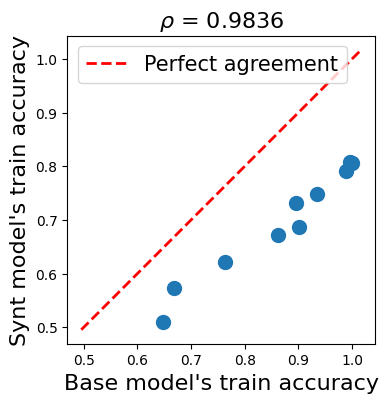

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the training accuracy values
ax.scatter(original_training_accuracies[:], synthetic_training_accuracies[:], s=100)

# Calculate the correlation coefficient between the training accuracy values
training_correlation_coefficient = np.corrcoef(original_training_accuracies[:], synthetic_training_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's train accuracy", fontsize=16)
ax.set_ylabel("Synt model's train accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red', label='Perfect agreement')


# Add a legend to the plot
ax.legend(fontsize=15)

# Display the plot
plt.show()

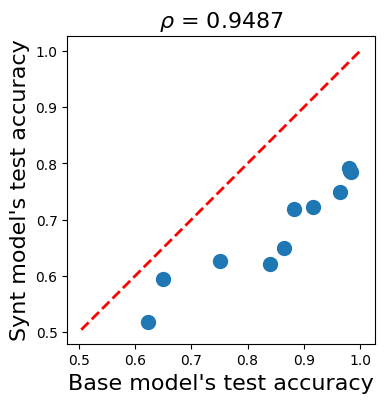

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the test accuracy values
ax.scatter(original_test_accuracies[:], synthetic_test_accuracies[:], s=100)

# Calculate the correlation coefficient between the test accuracy values
test_correlation_coefficient = np.corrcoef(original_test_accuracies[:], synthetic_test_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's test accuracy", fontsize=16)
ax.set_ylabel("Synt model's test accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(test_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red')


# Display the plot
plt.show()